This file contains the code to collect and save the training data for the hand gesture detection program. We use OpenCV to load our camera and view the keypoints before saving them. Google's mediapipe library will help us track the position of our hand by detecting 21 keypoints on our hand, called landmarks. These landmarks are shown below.  

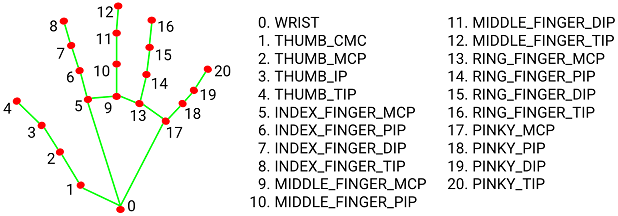

We can record the positions of the landmarks for each gesture that we want to classify, and use this as training data to train our gesture detection model. As an example, we will create a program which will classify our hand gesture between the numbers one and five, based on how many fingers we are holding up.

In [1]:
import mediapipe as mp
import cv2
import csv

#Adjust the variables below to specify the number and names of the classes
num_classes = 6
class_names = ["one", "two", "three", "four", "five", "other"]

def get_training_landmarks(landmarks):
    landmarks_list = []
    for landmark in landmarks:
        landmarks_list.append([landmark.x, landmark.y, landmark.z])
    return landmarks_list

The function below can be used to collect the training data for each class. Pass the class id as the argument for the class that you want to collect the training data for. For eg, if you want to collect training data for the first class, run the function as 'collectClassTrainingData(0)' .

After running the function, raise your hand in front of the camera. When it is detected by the mediapipe library, a new window will open which will show your camera view and the landmarks on the detected hand. Make the particular gesture and press the SPACE key to save the landmarks for that gesture. The landmarks will be saved in a file called 'training_{class_id}.csv'. When you are done collecting training samples for a particular class, press the ESC key to close the OpenCV window and return from the function.

For each gesture, try collecting at least 50 training samples. Try recording the samples from multiple angles and positions, so that the model can learn to classify the gesture effectively. If appropriate, try recording samples with each hand.

In [3]:
save_dir = "training_samples/training_" #Add path to the directory where you wish to save the csv files with the training data

def collectClassTrainingData(class_id):
    writer = csv.writer(open(save_dir + str(class_id) +
                             ".csv", 'a', newline = ''))
    mp_drawing = mp.solutions.drawing_utils
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(max_num_hands = 1, min_detection_confidence = 0.7, min_tracking_confidence = 0.6)

    cam = cv2.VideoCapture(0)
    
    while True:
        valid, img = cam.read()
        if not valid:
            print("Failed to grab frame, closing..")
            break

        img = cv2.cvtColor(cv2.flip(img, 1), cv2.COLOR_BGR2RGB)
        img.flags.writeable = False # To improve performance, optionally mark the image as not writeable to pass by reference.
        results = hands.process(img)
        img.flags.writeable = True
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        # Draw the hand annotations on the image.
        if(results.multi_hand_landmarks):
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(img, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            cv2.imshow("Landmark Hands", img)

        k = cv2.waitKey(1)
        if k%256 == 27:
            # ESC pressed
            print("Escape hit, closing...")
            break
        elif k%256 == 32:
            # SPACE pressed
            if(results.multi_hand_landmarks):
                for hand_landmarks in results.multi_hand_landmarks:
                    handedness = results.multi_handedness[0].classification[0].index
                    landmark_list = get_training_landmarks(hand_landmarks.landmark)
                    landmark_list.insert(0, class_id)
                    landmark_list.insert(1, handedness)
                    writer.writerow(landmark_list)
            else:
                print("No hand detected")
        #elif k%256 == 112:

    hands.close()
    cam.release()
    cv2.destroyAllWindows()

collectClassTrainingData(3)

Escape hit, closing...


Below are some examples from the training data collected for each class.

One:

Two:

Three:

Four:

Five:

Other: